In [42]:
import pandas as pd
import glob
import time
import warnings
import csv
import os
import matplotlib.pyplot as plt
import numpy as np

In [43]:
# Disable iPython low_memory warnings
warnings.filterwarnings('ignore')

In [44]:
# Read csv containing list of columns to drop
drop_col = pd.read_csv('C:\\Resources\\drop_columns.csv', index_col=False)
drop_col_list = drop_col['ColNum'].tolist()

# Read csv containing unique carrier IDs with full names
carriers = pd.read_csv('C:\\Resources\\L_UNIQUE_CARRIERS.csv', index_col=False)

In [45]:
start_time = time.time()

origin_df_list = []
dest_df_list = []
counter = 1

print('------------------------------\nBegin Data Munging\n------------------------------')

#path = "raw/*.csv"
path = 'C:\\Resources\\Flight_Delays_2016/*.csv'
for fname in glob.glob(path):
    print(f'Processing file {"{0:>2s}".format(str(counter))} of {len(glob.glob(path))} | {fname}')
    counter = counter + 1
    
    raw_data = pd.read_csv(fname, index_col=False)
    raw_df = pd.DataFrame(raw_data)
    raw_df = raw_df.drop(raw_df.iloc[:,drop_col_list], axis=1)
    
    origin_df = raw_df[raw_df['Origin'] == 'LAX']
    origin_df = origin_df.dropna(subset=['DepDel15'])
    origin_df = origin_df.join(carriers.set_index('Code')['Description'], on='UniqueCarrier')
    origin_df = origin_df.rename(columns={'Description':'CarrierName'})
    origin_df_list.append(origin_df)
    
    dest_df = raw_df[raw_df['Dest'] == 'LAX']
    dest_df = dest_df.dropna(subset=['ArrDel15'])
    dest_df = dest_df.join(carriers.set_index('Code')['Description'], on='UniqueCarrier')
    dest_df = dest_df.rename(columns={'Description':'CarrierName'})
    dest_df_list.append(dest_df)    

print('------------------------------\nSaving origin delay data...')
combined_origin = pd.concat(origin_df_list)
combined_origin = combined_origin.reset_index(drop=True)
combined_origin.to_csv('C:\\Resources\\LAX_Origin_Flight_Delays_2016.csv', encoding='utf-8', index=False)

print('Saving destination delay data...')
combined_dest = pd.concat(dest_df_list)
combined_dest = combined_dest.reset_index(drop=True)
combined_dest.to_csv('C:\\Resources\\LAX_Dest_Flight_Delays_2016.csv', encoding='utf-8', index=False)

print('------------------------------\nData Munging Complete')
print('Processing time: '+ str(round(time.time() - start_time, 2)) + ' seconds')
print('------------------------------')

------------------------------
Begin Data Munging
------------------------------
Processing file  1 of 12 | C:\Resources\Flight_Delays_2016\On_Time_On_Time_Performance_2016_1.csv
Processing file  2 of 12 | C:\Resources\Flight_Delays_2016\On_Time_On_Time_Performance_2016_10.csv
Processing file  3 of 12 | C:\Resources\Flight_Delays_2016\On_Time_On_Time_Performance_2016_11.csv
Processing file  4 of 12 | C:\Resources\Flight_Delays_2016\On_Time_On_Time_Performance_2016_12.csv
Processing file  5 of 12 | C:\Resources\Flight_Delays_2016\On_Time_On_Time_Performance_2016_2.csv
Processing file  6 of 12 | C:\Resources\Flight_Delays_2016\On_Time_On_Time_Performance_2016_3.csv
Processing file  7 of 12 | C:\Resources\Flight_Delays_2016\On_Time_On_Time_Performance_2016_4.csv
Processing file  8 of 12 | C:\Resources\Flight_Delays_2016\On_Time_On_Time_Performance_2016_5.csv
Processing file  9 of 12 | C:\Resources\Flight_Delays_2016\On_Time_On_Time_Performance_2016_6.csv
Processing file 10 of 12 | C:\Reso

In [46]:
#create origin df
origin_delays_path = os.path.join("C:/", "Resources", "LAX_Origin_Flight_Delays_2016.csv")
origin_delays_df = pd.read_csv(origin_delays_path)
#origin_delays_df.head()

In [47]:
#Find Length of Average Delay at Origin
average_delay_origin = origin_delays_df["ArrDelayMinutes"].mean()
average_delay_origin

13.907741472888462

In [48]:
#group df by month and then take the average of the minutes delay
origin_delays_df.groupby(["Month"])["ArrDelayMinutes"].mean()

Month
1     13.090056
2     10.332787
3     13.240777
4     10.696318
5     10.919717
6     17.503290
7     17.094456
8     17.702030
9     11.173404
10    12.004929
11    10.468303
12    20.809794
Name: ArrDelayMinutes, dtype: float64

In [49]:
#group df by carrier and month, and then take the average of the minutes delay
origin_avg_delay = origin_delays_df.groupby(["CarrierName",'Month'])["ArrDelayMinutes"].mean()

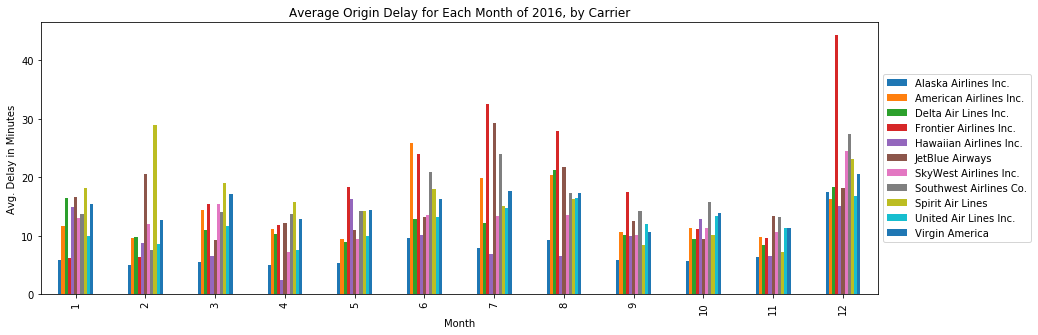

In [50]:
#avg delay each month for each of the 5 carriers at ORIGIN

origin_delay = origin_avg_delay.reset_index().pivot(index='Month', columns='CarrierName', values='ArrDelayMinutes').fillna(0)

origin_delay.plot(kind='bar', figsize=(15,5), title=("Average Origin Delay for Each Month of 2016, by Carrier"))
ax = plt.subplot(111)
                  
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel("Month")
ax.set_ylabel("Avg. Delay in Minutes")
plt.savefig("avgorigindelay.png")
plt.show()


In [51]:
#create destination df
dest_delays_path = os.path.join("C:/", "Resources", "LAX_Dest_Flight_Delays_2016.csv")
dest_delays_df = pd.read_csv(dest_delays_path)
#dest_delays_df.head()

In [52]:
#find Length of Average Delay at Destination
average_delay_dest = dest_delays_df["DepDelayMinutes"].mean()
average_delay_dest

12.52059267415261

In [53]:
#group df by month and then take the average of the minutes delay
dest_delays_df.groupby(["Month"])["DepDelayMinutes"].mean()

Month
1     11.712919
2      9.447735
3     11.946523
4      9.836915
5     10.859642
6     15.175723
7     16.274373
8     15.055184
9      9.563901
10    10.339381
11     9.069926
12    19.338474
Name: DepDelayMinutes, dtype: float64

In [54]:
#group df by carrier and month, and then take the average of the minutes delay
dest_avg_delay = dest_delays_df.groupby(["CarrierName",'Month'])["DepDelayMinutes"].mean()
#dest_avg_delay

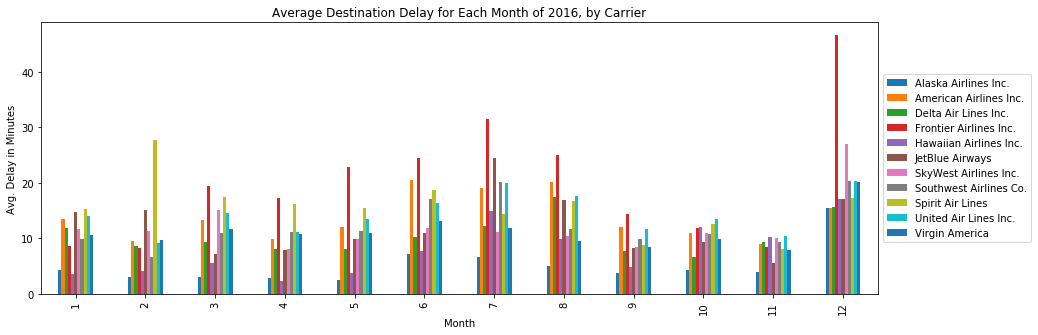

In [55]:
#avg delay each month for each of the 5 carriers at DESTINATION

dest_delay = dest_avg_delay.reset_index().pivot(index='Month', columns='CarrierName', values='DepDelayMinutes').fillna(0)

dest_delay.plot(kind='bar', figsize=(15,5), title=("Average Destination Delay for Each Month of 2016, by Carrier"))
ax = plt.subplot(111)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel("Month")
ax.set_ylabel("Avg. Delay in Minutes")
plt.savefig("avgdestdelay.png")
plt.show()